# Advanced Data Science

# 1. Modelos KNN

A função make_blobs() pode ser usada para gerar blobs de pontos com uma distribuição gaussiana. Você pode controlar quantos blobs serão gerados e o número de amostras a serem geradas, bem como uma série de outras propriedades.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [1, 8]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)

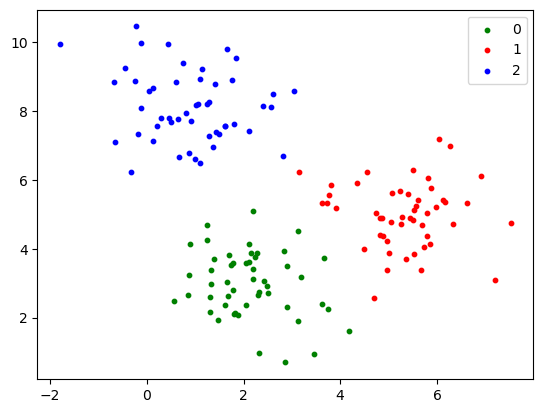

In [2]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
# n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                    train_size=0.8, test_size=0.2, random_state=1)

In [4]:
y_train

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0,
       0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0,
       1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2,
       2, 1, 1, 1, 1, 2, 0, 0, 2, 1])

In [5]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# a instância do KNN está a ser criada sem parâmetros
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print("Previsões do classificador:")
print(y_pred)
print("Target:")
print(y_test)

Previsões do classificador:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]
Target:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]


In [6]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

1.0


In [7]:
from sklearn.metrics import accuracy_score

example_predictions = [0, 2, 1, 3, 2, 0, 1]
example_labels      = [0, 1, 2, 3, 2, 1, 1]
print(accuracy_score(example_predictions, example_labels))

0.5714285714285714


## 1.1 KNN com parâmetros e Dataset Iris

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
data, labels = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.7, test_size=0.3, random_state=1)

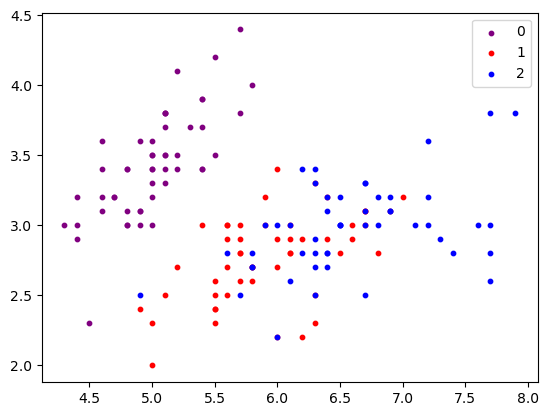

In [9]:
import matplotlib.pyplot as plt

colours = ('purple', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

In [10]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# instanciação com parâmetros
knn2 = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=30, 
                           metric='minkowski',
                           p=2,
                           metric_params=None, 
                           n_jobs=1, 
                           n_neighbors=2, 
                           weights='uniform')

In [11]:
knn2.fit(X_train, y_train) 

y_pred = knn2.predict(X_test)
print("Previsões do classificador:")
print(y_pred)
print("Target:")
print(y_test)

Previsões do classificador:
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
Target:
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [12]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.9777777777777777


**Proposta**- Varie o nº de vizinhos e também o nº de elementos nos conjuntos de treino e de teste

In [13]:
y_test_proba = knn2.predict_proba(X_test)
y_test_proba[:10]

array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

In [14]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm_thr50 = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm_thr50,columns = ['pred: 0','pred: 1','pred: 2'],
                   index = ['real: 0','real: 1','real: 2']))

         pred: 0  pred: 1  pred: 2
real: 0       14        0        0
real: 1        0       18        0
real: 2        0        1       12


In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# por omissão average='binary' mas pode também ser None 'micro', 'macro' e 'weighted'
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.978
Recall: 0.978
Accuracy: 0.978


In [16]:
from sklearn.metrics import classification_report

print(
    f"Classification report for classifier {knn2}:\n"
    f"{classification_report(y_test, y_pred)}\n"
)

Classification report for classifier KNeighborsClassifier(n_jobs=1, n_neighbors=2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45




The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.<br> <br>

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.<br> <br>

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.<br> <br>

The support is the number of occurrences of each class in y_test.

# 2. Avaliação de Modelos

Imaginem que estamos a dar uma festa para 200 pessoas. Algumas pessoas gostam mais de doces outras mais de salgados. <br>
Vamos tentar prever se uma pessoa gosta mais de doces ou de salgados usando as preferências dos seus vizinhos usando o KNN

In [17]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=200, 
                          centers=np.array(centers),
                          random_state=1)

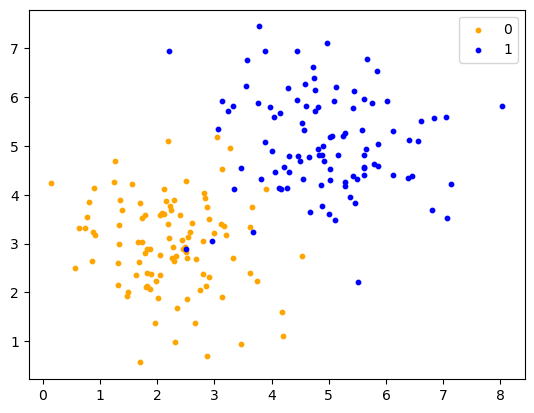

In [18]:
import matplotlib.pyplot as plt

colours = ('orange', 'blue')
# n_classes = 2

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, test_size=0.2, random_state=1)

In [20]:
y_train[:20]

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [21]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# vamos aumentar a complexidade aumentando o nº de vizinhos
k_range = range(1,20)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    

In [22]:
scores

{1: 0.9,
 2: 0.875,
 3: 0.9,
 4: 0.925,
 5: 0.95,
 6: 0.925,
 7: 0.95,
 8: 0.95,
 9: 0.95,
 10: 0.95,
 11: 0.95,
 12: 0.95,
 13: 0.95,
 14: 0.95,
 15: 0.95,
 16: 0.95,
 17: 0.95,
 18: 0.95,
 19: 0.95}

In [23]:
print(*scores_list, sep = ", ")

0.9, 0.875, 0.9, 0.925, 0.95, 0.925, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95


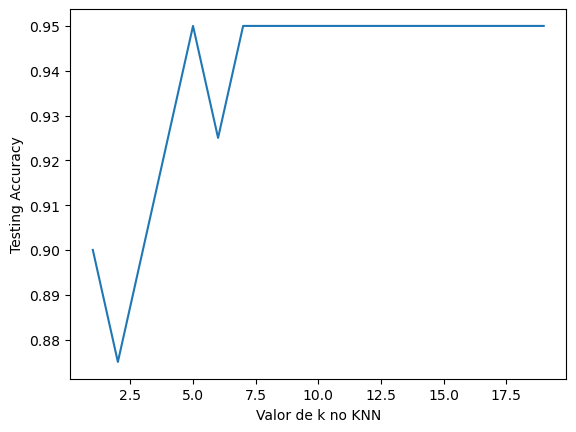

In [24]:
import matplotlib.pyplot as plt

# vamos fazer o plot da relação entre o aumento do nº de vizinhos k
# e o valor da accuracy medido nos dados de Teste
plt.plot(k_range, scores_list)
plt.xlabel("Valor de k no KNN")
plt.ylabel("Testing Accuracy")
plt.show()

In [25]:
# parece não haver ganhos a partir dos 8 vizinhos
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train) 

classes = {0: 'doces', 1: 'salgados'}

x_new = [[5.88213357, 3.75041164], [1.6546771, 3.6924546 ]]
y_predict = knn.predict(x_new)
y_predict_prob = knn.predict_proba(x_new)

print('O elemento {0} gosta mais de {1}'.format(x_new[0],classes[y_predict[0]]))
print('O elemento {0} gosta mais de {1}'.format(x_new[1],classes[y_predict[1]]))

O elemento [5.88213357, 3.75041164] gosta mais de salgados
O elemento [1.6546771, 3.6924546] gosta mais de doces


# 3. Matriz de Confusão

In [60]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=200, 
                          centers=np.array(centers),
                          random_state=1)

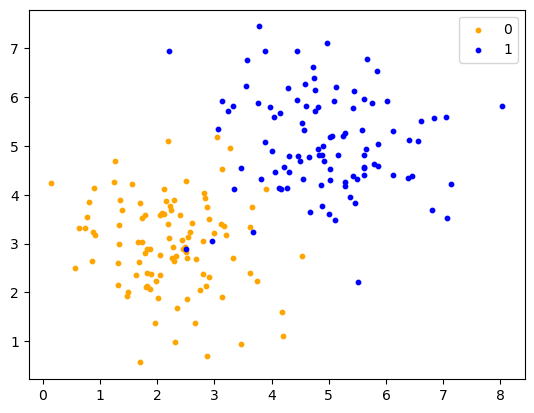

In [61]:
import matplotlib.pyplot as plt

colours = ('orange', 'blue')
# n_classes = 2

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, test_size=0.2, random_state=1)

In [63]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 6)
    
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
score

0.925

In [64]:
knn.predict_proba(X_test)[:, 1]

array([1.        , 0.16666667, 0.66666667, 0.        , 1.        ,
       1.        , 1.        , 0.5       , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.16666667, 1.        , 1.        , 1.        , 0.16666667,
       0.        , 0.66666667, 0.        , 1.        , 1.        ,
       1.        , 0.16666667, 1.        , 0.        , 0.83333333,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.33333333, 0.        , 1.        , 0.16666667])

In [65]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[14,  1],
       [ 2, 23]], dtype=int64)

In [66]:
y_test

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [67]:
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm,columns = ['pred: No','pred: Yes'],
                   index = ['real: No','real: Yes']))

           pred: No  pred: Yes
real: No         14          1
real: Yes         2         23


In [68]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.958
Recall: 0.920
Accuracy: 0.925


### Vamos calcular manualmente usando as fórmulas

In [69]:
# Accuracy = TP + TN / P + N
f_acc = (23 + 14)/ (( 2 + 23) + (14 + 1))
f_acc

0.925

In [70]:
# Recall ou sensitivity ou TPR - linha yes da matriz
# Dos que são positivos quantos previu?
# TPR = TP / P
f_recall = 23 / 25
f_recall

0.92

In [71]:
print(pd.DataFrame(cm,columns = ['pred: No','pred: Yes'], index = ['real: No','real: Yes']))

           pred: No  pred: Yes
real: No         14          1
real: Yes         2         23


In [73]:
# Precision - coluna yes da matriz
# Dos que previu como positivos quantos eram realmente positivos? 
# Precision = TP / TP + FP
f_precision = 23 / (23 + 1)
f_precision

0.9583333333333334

In [74]:
# Specificity ou Selectivity ou TNR - Linha no da matriz
# TNR = TN / N 
f_specificity = 14 / (14 + 1)
f_specificity

0.9333333333333333

# 4. Receiver Operating Characteristics (ROC) e Area Under the Curve (AUC)

Recordem que sempre que variámos o nº de vizinhos (ou outros parâmetros do algoritmo) obtemos um classificador diferente.
Quando variamos o threshold da decisão obtemos uma nova matriz de confusão do mesmo classificador e é isso que nos permite desenhar a curva ROC.

In [78]:
model = knn.fit(X_train, y_train)

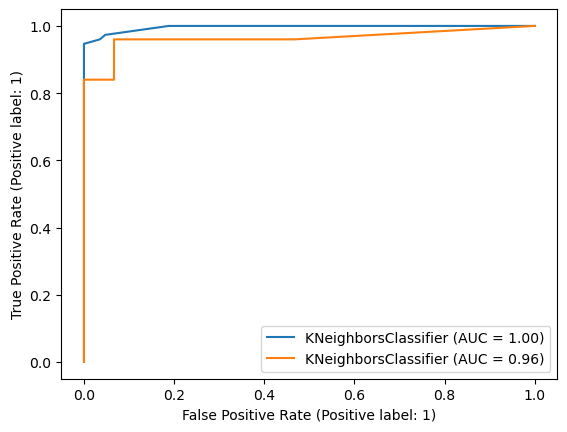

In [80]:
from sklearn.metrics import roc_curve, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1],
                                 drop_intermediate=False)

knn_disp = RocCurveDisplay.from_estimator(model, X_train, y_train)
roc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=knn_disp.ax_)

In [81]:
thresholds

array([       inf, 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

In [83]:
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm,columns = ['pred: No','pred: Yes'],
                   index = ['real: No','real: Yes']))

           pred: No  pred: Yes
real: No         14          1
real: Yes         2         23


In [85]:
# FPR = FP / N
FPR_50 = 1 / 15
FPR_50

0.06666666666666667

In [86]:
# TPR = TP / P
TPR_50 = 23 / 25
TPR_50

0.92

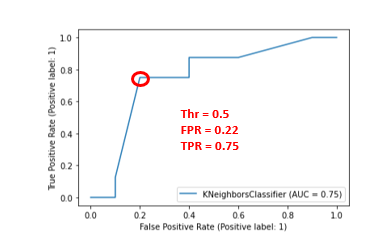

In [87]:
threshold = 0.33
y_pred = (model.predict_proba(X_test)[:, 1] > threshold)

cm_thr33 = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm_thr33,columns = ['pred: No','pred: Yes'],
                   index = ['real: No','real: Yes']))

           pred: No  pred: Yes
real: No         13          2
real: Yes         1         24


In [88]:
# FPR = FP / N
FPR_33 = 2 / 15
# TPR = TP / P
TPR_33 = 24 / 25
print('O FPR é {0} quando o TPR é {1}' . format(FPR_33,TPR_33))

O FPR é 0.13333333333333333 quando o TPR é 0.96


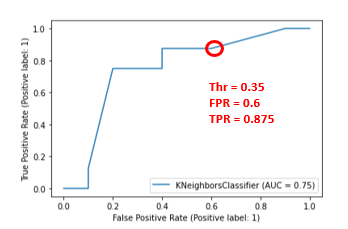

In [89]:
threshold = 0.83
y_pred = (model.predict_proba(X_test)[:, 1] > threshold)

cm_thr83 = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm_thr83,columns = ['pred: No','pred: Yes'],
                   index = ['real: No','real: Yes']))

           pred: No  pred: Yes
real: No         14          1
real: Yes         4         21


In [90]:
# FPR = FP / N
FPR_83 = 1 / 15
# TPR = TP / P
TPR_83 = 21 / 25
print('O FPR é {0} quando o TPR é {1}' . format(FPR_83,TPR_83))

O FPR é 0.06666666666666667 quando o TPR é 0.84


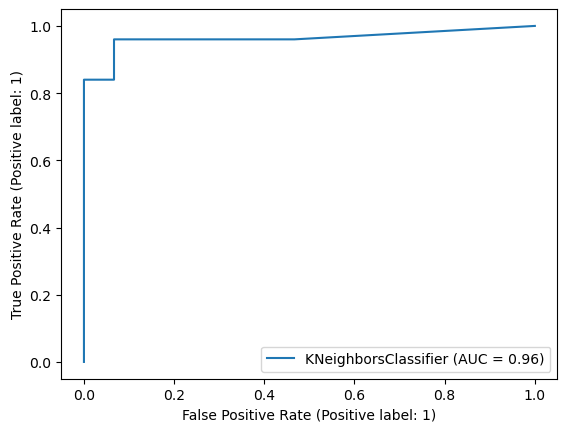

In [94]:
knn_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)